In [1]:
#pip install graphviz

In [2]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
import time
from numpy.random import seed
import graphviz
import tensorflow as tf
import os

In [3]:
tf.random.set_seed(2)

# install Graphviz to plot the structure of CNN model
#os.environ["PATH"] += os.pathsep + 'E:/Lancaster University/python/Graphviz/bin'

# global variable
batch_size = 120
nb_classes = 10
epochs = 10
# input image dimensions
img_rows, img_cols = 28, 28
#The number of Convolution filter
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [4]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
y_train.shape

(60000,)

In [6]:
#reshaping data black-white/single channel images
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)

#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
checkpoint = ModelCheckpoint('weights.hdf5',monitor='val_loss',save_best_only=True) 

In [8]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(nb_filters,kernel_size,activation='tanh',input_shape=(img_rows,img_cols,1),padding='same'))
#adding pooling layer
model.add(MaxPool2D(pool_size))
#model.add(Activation('relu')) #active function
model.add(Conv2D(nb_filters,kernel_size,activation='tanh'))
#model.add(MaxPool2D(pool_size)) # two pooling layers
model.add(Dropout(0.5)) # remove the overfitting 50 percent of weights
#adding fully connected layer
model.add(Flatten()) # flatten the data
#adding output layer
model.add(Dense(nb_classes,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #only accuracy available for multi-class classification

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                        

In [10]:
#fitting the model
start = time.process_time()
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=1, validation_split=0.2,callbacks=[checkpoint])
print('Time: ',time.process_time()-start)

400/400 [==============================] - 17s 9ms/step - loss: 0.4045 - accuracy: 0.8803 - val_loss: 0.2209 - val_accuracy: 0.9378
Time:  6.493751676


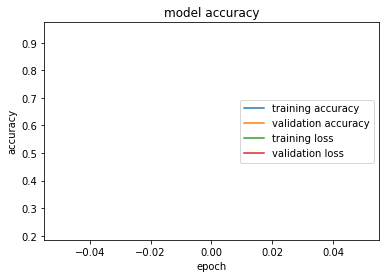

In [11]:
# plot the loss and accuracy
plt.figure()
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='center right')
plt.savefig('relu_acc.jpg')


In [12]:
#evaluting the model
model.load_weights('weights.hdf5')
x=model.predict(X_test)
model.evaluate(X_test,y_test)



313/313 [==============================] - 1s 4ms/step - loss: 0.2257 - accuracy: 0.9355


[0.225691556930542, 0.9355000257492065]

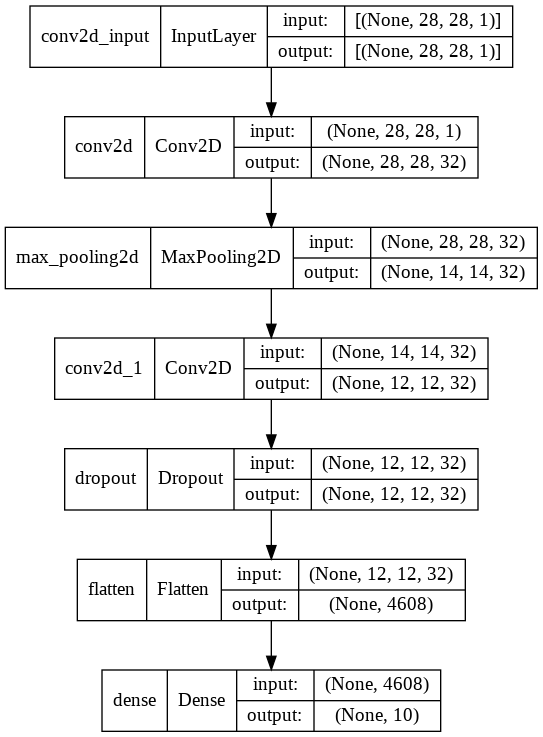

In [13]:
# plot the structure of the model
plot_model(model, show_shapes = True)

In [14]:
x[0]

array([1.9354231e-06, 5.7702759e-10, 3.7804991e-06, 1.3380912e-03,
       2.1496287e-06, 1.0740248e-06, 2.7614535e-09, 9.9842703e-01,
       3.3719666e-06, 2.2261211e-04], dtype=float32)

In [15]:
y_test[0]

7

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
#reshaping data black-white/single channel images
X_train = X_train.reshape((X_train.shape[0],784))
X_test = X_test.reshape((X_test.shape[0],784))


In [18]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50,activation='tanh',input_shape =(784,)))

# Add the second hidden layer
model.add(Dense(50,activation='tanh'))

# Add the output layer
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
# Fit the model
start2 = time.process_time()
history2 = model.fit(X_train,y_train,validation_split=0.2,epochs = 1)
print('time: ',time.process_time()-start2)
model.evaluate(X_test,y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                39250     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3311 - accuracy: 0.9071 - val_loss: 0.1992 - val_accuracy: 0.9421
time:  7.509630797
313/313 [==============================] - 1s 4ms/step - loss: 0.1986 - accuracy: 0.9393


[0.19862693548202515, 0.939300000667572]

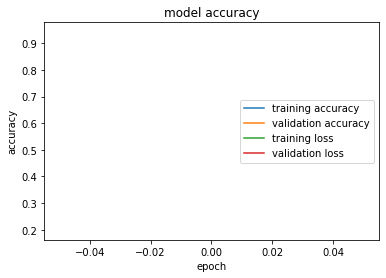

In [19]:
# plot the loss and accuracy
plt.figure()
plt.plot(history2.history['accuracy'],label='training accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.plot(history2.history['loss'],label='training loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='center right')
plt.savefig('relu_acc.jpg')


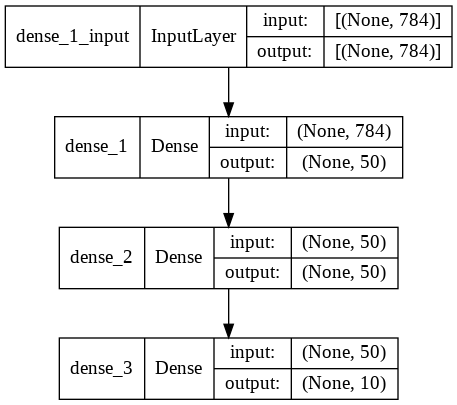

In [20]:
plot_model(model, show_shapes = True)